# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 18:45:38.273252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T18:45:41.908799
2025-04-14 18:45:41.908799


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 18:45:35"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

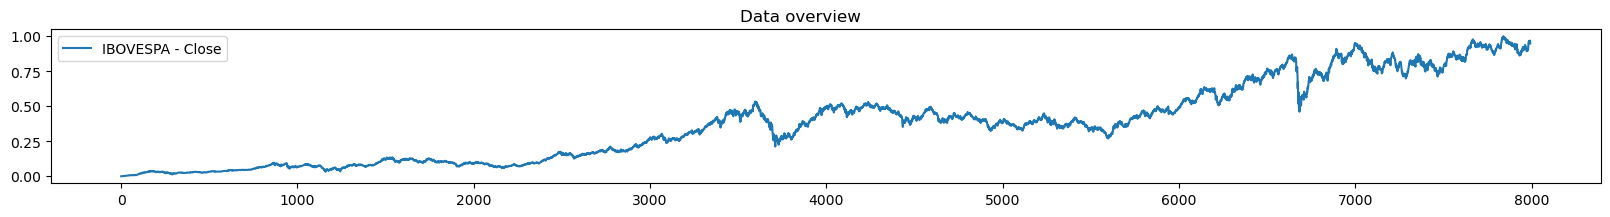

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

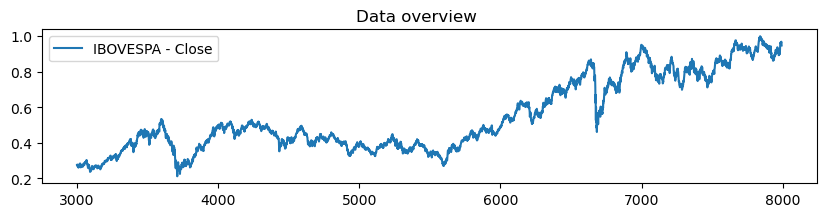

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

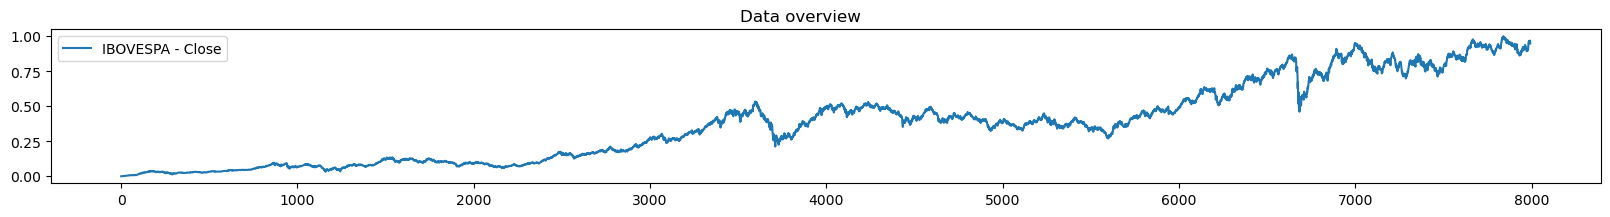

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

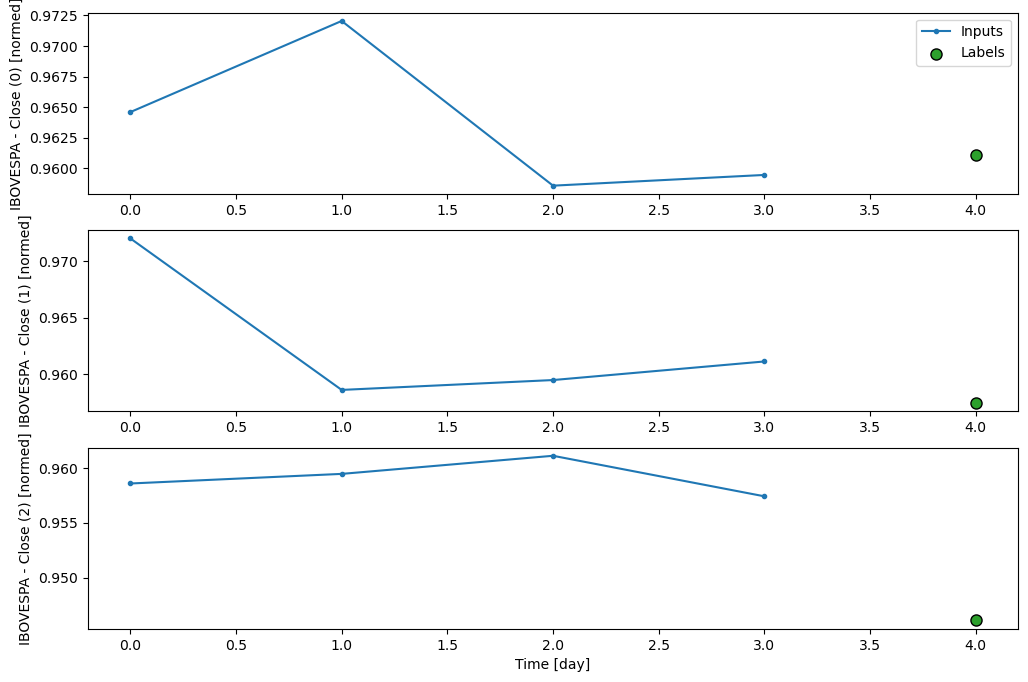

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

1

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 19:33 5s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 57.1261 - mean_squared_error: 4.2391e-05 - root_mean_squared_error: 0.0060   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.3083 - mean_squared_error: 5.4207e-05 - root_mean_squared_error: 0.0071

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 40.2736 - mean_squared_error: 5.3133e-05 - root_mean_squared_error: 0.0071

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 35.6267 - mean_squared_error: 5.6751e-05 - root_mean_squared_error: 0.0073

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 32.8093 - mean_squared_error: 6.8616e-05 - root_mean_squared_error: 0.0080

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 31.4559 - mean_squared_error: 9.1596e-05 - root_mean_squared_error: 0.0091

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.3858 - mean_squared_error: 1.2429e-04 - root_mean_squared_error: 0.0103

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 29.3723 - mean_squared_error: 1.4733e-04 - root_mean_squared_error: 0.0112

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 28.6166 - mean_squared_error: 1.6278e-04 - root_mean_squared_error: 0.0119

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 27.9361 - mean_squared_error: 1.7999e-04 - root_mean_squared_error: 0.0125

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 27.5070 - mean_squared_error: 2.0727e-04 - root_mean_squared_error: 0.0133

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 26.9796 - mean_squared_error: 2.3180e-04 - root_mean_squared_error: 0.0141

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 26.5647 - mean_squared_error: 2.6063e-04 - root_mean_squared_error: 0.0149

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 26.1639 - mean_squared_error: 3.1487e-04 - root_mean_squared_error: 0.0161

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 25.8458 - mean_squared_error: 3.7781e-04 - root_mean_squared_error: 0.0174

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 25.5655 - mean_squared_error: 4.5248e-04 - root_mean_squared_error: 0.0187

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 25.3439 - mean_squared_error: 5.6737e-04 - root_mean_squared_error: 0.0205

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 25.1252 - mean_squared_error: 7.3040e-04 - root_mean_squared_error: 0.0227

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 24.9286 - mean_squared_error: 8.5885e-04 - root_mean_squared_error: 0.0244

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 24.7322 - mean_squared_error: 9.7880e-04 - root_mean_squared_error: 0.0260

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 24.5294 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0274    

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 24.3236 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0287

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 24.1254 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0299

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 23.9343 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0310

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 23.7508 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 23.5564 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 23.4142 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 23.2674 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 23.0983 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 22.9622 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 22.7875 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0378

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 22.6333 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 22.5008 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0395 - val_loss: 0.1830 - val_mean_absolute_error: 0.1830 - val_mean_absolute_percentage_error: 19.6526 - val_mean_squared_error: 0.0350 - val_root_mean_squared_error: 0.1870


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7167 - mean_absolute_error: 0.7167 - mean_absolute_percentage_error: 33631.2930 - mean_squared_error: 0.5136 - root_mean_squared_error: 0.7167

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6946 - mean_absolute_error: 0.6946 - mean_absolute_percentage_error: 15508.8721 - mean_squared_error: 0.4835 - root_mean_squared_error: 0.6951 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6475 - mean_absolute_error: 0.6475 - mean_absolute_percentage_error: 10700.8701 - mean_squared_error: 0.4285 - root_mean_squared_error: 0.6527

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5873 - mean_absolute_error: 0.5873 - mean_absolute_percentage_error: 8623.1416 - mean_squared_error: 0.3754 - root_mean_squared_error: 0.6073 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5250 - mean_absolute_error: 0.5250 - mean_absolute_percentage_error: 7133.7412 - mean_squared_error: 0.3267 - root_mean_squared_error: 0.5620

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4789 - mean_absolute_error: 0.4789 - mean_absolute_percentage_error: 6231.8882 - mean_squared_error: 0.2934 - root_mean_squared_error: 0.5288

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4354 - mean_absolute_error: 0.4354 - mean_absolute_percentage_error: 5469.4141 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4972

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4040 - mean_absolute_error: 0.4040 - mean_absolute_percentage_error: 4954.5498 - mean_squared_error: 0.2421 - root_mean_squared_error: 0.4738

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3772 - mean_absolute_error: 0.3772 - mean_absolute_percentage_error: 4537.3887 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4534

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 4147.1123 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4332

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 3862.2490 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4177

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 3585.7698 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.4019

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2972 - mean_absolute_error: 0.2972 - mean_absolute_percentage_error: 3377.5784 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3895

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 3194.6055 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3782

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2721 - mean_absolute_error: 0.2721 - mean_absolute_percentage_error: 3032.3794 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3680

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 2887.4336 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3585

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 2757.0947 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3499

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 2639.3005 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3421

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 2532.1516 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3348

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 2434.2095 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3280

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 2356.7048 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3226

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 2272.9082 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3166

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 2195.4377 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3109

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 2123.5830 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3055

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 2056.7358 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3005

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 1994.3805 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2957

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 1936.0675 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2911

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 1881.4122 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2868

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1849 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 1830.0671 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2827

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1815 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 1781.7234 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2789

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 1736.1266 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2753

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 1693.0341 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2719

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 1646.5800 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2681

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1692 - mean_absolute_error: 0.1692 - mean_absolute_percentage_error: 1602.8474 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2646


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 1597.5685 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2641 - val_loss: 0.1469 - val_mean_absolute_error: 0.1469 - val_mean_absolute_percentage_error: 15.7389 - val_mean_squared_error: 0.0230 - val_root_mean_squared_error: 0.1517


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.6674 - mean_absolute_error: 0.6674 - mean_absolute_percentage_error: 31313.4980 - mean_squared_error: 0.4455 - root_mean_squared_error: 0.6674

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6542 - mean_absolute_error: 0.6542 - mean_absolute_percentage_error: 15474.8408 - mean_squared_error: 0.4283 - root_mean_squared_error: 0.6544 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6312 - mean_absolute_error: 0.6312 - mean_absolute_percentage_error: 11218.1562 - mean_squared_error: 0.4007 - root_mean_squared_error: 0.6324

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5791 - mean_absolute_error: 0.5791 - mean_absolute_percentage_error: 8550.9502 - mean_squared_error: 0.3524 - root_mean_squared_error: 0.5905 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5350 - mean_absolute_error: 0.5350 - mean_absolute_percentage_error: 7329.1216 - mean_squared_error: 0.3181 - root_mean_squared_error: 0.5582

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4885 - mean_absolute_error: 0.4885 - mean_absolute_percentage_error: 6318.9663 - mean_squared_error: 0.2850 - root_mean_squared_error: 0.5248

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4495 - mean_absolute_error: 0.4495 - mean_absolute_percentage_error: 5579.2144 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4963

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4170 - mean_absolute_error: 0.4170 - mean_absolute_percentage_error: 5011.4346 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4720

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3930 - mean_absolute_error: 0.3930 - mean_absolute_percentage_error: 4618.5322 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4538

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3753 - mean_absolute_error: 0.3753 - mean_absolute_percentage_error: 4340.1689 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4402

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3562 - mean_absolute_error: 0.3562 - mean_absolute_percentage_error: 4051.9617 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4254

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 3803.5964 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4120

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 3553.6453 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3980

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 3337.7903 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3854

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 3227.0625 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3787

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 3051.7625 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3678

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 2896.4021 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3579

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 2795.7681 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3513

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 2684.7957 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3438

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 2567.1016 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3358

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 2460.3445 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3283

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 2349.7959 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3205

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 2273.8540 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3150

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 2191.8596 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3090

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 2137.1843 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3049

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 2065.5149 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2995

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1998.9633 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2943

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 1936.9824 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2894

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 1871.1526 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2842

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 1817.4828 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2798

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 1760.1689 - mean_squared_error: 0.0927 - root_mean_squared_error: 0.2752

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 1706.7036 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2707

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 1662.7788 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2671

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 1621.2852 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2636

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 1582.0120 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2603

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 1544.7778 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2572


Epoch: 3 - LR: 0.009275324642658234


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 1519.3528 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2550 - val_loss: 0.1233 - val_mean_absolute_error: 0.1233 - val_mean_absolute_percentage_error: 13.1906 - val_mean_squared_error: 0.0166 - val_root_mean_squared_error: 0.1288


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.4694 - mean_absolute_error: 0.4694 - mean_absolute_percentage_error: 22009.7734 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4694

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4359 - mean_absolute_error: 0.4359 - mean_absolute_percentage_error: 9475.9951 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4377  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3756 - mean_absolute_error: 0.3756 - mean_absolute_percentage_error: 6582.6104 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3890

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 5304.7900 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3552

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 4482.7593 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3286

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 3904.0107 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.3073

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 3472.0815 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2899

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 3135.1416 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2752

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 2829.4521 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2610

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 2611.6946 - mean_squared_error: 0.0711 - root_mean_squared_error: 0.2503

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1920 - mean_absolute_error: 0.1920 - mean_absolute_percentage_error: 2428.5496 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2409

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 2272.0129 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2326

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 2118.5425 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2241

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 2001.9690 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2174

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 1885.0199 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2105

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 1782.2777 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2043

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 1702.0308 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.1993

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 1629.4053 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1947

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 1563.3229 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1904

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 1502.9027 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1864

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 1447.4244 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1826

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 1389.2999 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1786

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1342.4996 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1754

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 1293.0918 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1718

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 1253.0305 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1689

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1215.6184 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1662

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 1190.3683 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1643

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 1156.8977 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1618

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 1125.4343 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1594

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 1095.7972 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1571

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 1067.8375 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1550

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 1037.7487 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1528

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 1012.9092 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1509


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 989.3491 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1491 - val_loss: 0.0699 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 7.4341 - val_mean_squared_error: 0.0057 - val_root_mean_squared_error: 0.0757


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 17127.6230 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3646

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3447 - mean_absolute_error: 0.3447 - mean_absolute_percentage_error: 7848.9321 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3454  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 5556.5542 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.3177

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 4415.5742 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2930

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 3620.7109 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2694

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 3091.7007 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2506

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 2711.1194 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2353

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 2454.5396 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2240

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 2220.3352 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2129

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1671 - mean_absolute_error: 0.1671 - mean_absolute_percentage_error: 2052.7336 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2045

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1580 - mean_absolute_error: 0.1580 - mean_absolute_percentage_error: 1911.2372 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1971

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 1789.9309 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1904

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 1684.5978 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1844

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 1592.1722 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1790

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 1499.4290 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1734

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 1417.9423 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1684

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 1354.3008 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1643

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1296.7157 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1607

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 1244.3267 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1573

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 1196.4301 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1542

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 1152.4475 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1513

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 1111.8965 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1485

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1074.3793 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1459

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 1034.7860 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1431

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 1002.6893 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1408

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 968.6012 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1383 

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 940.8054 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1363

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 911.1140 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1340

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 886.7750 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1322

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 863.8287 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1304

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 842.1583 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1288

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 827.4003 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1277

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 804.9380 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1259


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 788.9601 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1247 - val_loss: 0.0180 - val_mean_absolute_error: 0.0180 - val_mean_absolute_percentage_error: 1.9531 - val_mean_squared_error: 5.3447e-04 - val_root_mean_squared_error: 0.0231


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 14327.3184 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.3050

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 6564.5669 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2887  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 4482.0708 - mean_squared_error: 0.0701 - root_mean_squared_error: 0.2630

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 3590.5574 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2416

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 2959.5635 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2219

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1865 - mean_absolute_error: 0.1865 - mean_absolute_percentage_error: 2580.4468 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.2081

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 2296.3669 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1966

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1591 - mean_absolute_error: 0.1591 - mean_absolute_percentage_error: 2074.4700 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1868

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 1895.8317 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1785

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 1748.4680 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1712

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 1608.5706 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1639

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1505.1788 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1583

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 1403.8289 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1526

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 1316.5774 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1475

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 1249.5339 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1435

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 1181.6312 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1393

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 1128.6047 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1360

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1074.1238 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1326

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 1031.0298 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1299

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 986.2387 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1270 

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 950.4282 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1246

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 917.3759 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1223

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 886.7655 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1202

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 858.3285 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1182

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 831.8339 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1163

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 803.6877 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1143

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 777.5671 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1124

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 756.1976 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1108

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 736.0812 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1092

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 717.1090 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1078

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 699.1837 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1064

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 682.2195 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1051

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 666.1375 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1038


Epoch: 6 - LR: 0.008603165857493877


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 657.3215 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1031 - val_loss: 0.0399 - val_mean_absolute_error: 0.0399 - val_mean_absolute_percentage_error: 4.2458 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0436


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 15132.6865 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.3221

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 6940.9829 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.3065   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 4775.9756 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2857

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 3849.6824 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2658

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 3255.5571 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2486

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 2786.7227 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2322

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 2448.5613 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2186

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1842 - mean_absolute_error: 0.1842 - mean_absolute_percentage_error: 2220.1423 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.2086

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 2011.2322 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1987

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 1842.0481 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1901

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 1718.1619 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1835

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 1611.6487 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1776

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 1518.9175 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1722

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 1426.4926 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1667

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 1355.3051 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1623

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 1283.0242 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1577

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 1226.4460 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1540

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1168.1959 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1501

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 1122.0298 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1469

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 1079.7303 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1439

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 1040.8153 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1412

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1004.8810 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1385

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 971.5861 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1361 

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 940.6423 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1337

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 907.8382 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1312

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 881.1408 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1291

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 856.1212 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1271

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 832.6196 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1252

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 807.4417 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1232

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 786.7480 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1215

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 764.4860 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1196

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 746.1169 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1181

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 726.2789 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1164


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 721.5050 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1160 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 1.6148 - val_mean_squared_error: 3.3138e-04 - val_root_mean_squared_error: 0.0182


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 10835.2354 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2305

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 4946.2314 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.2152  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 3500.1199 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1974

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 2772.5469 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1806

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1569 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 2323.8362 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1677

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 2051.9041 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1586

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 1844.2694 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1510

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 1655.1555 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1435

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 1505.2059 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1371

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 1383.1257 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1315

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 1281.4528 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1267

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 1195.2070 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1223

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 1111.2632 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1179

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 1047.9114 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1145

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 992.1302 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1113 

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 942.5916 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1084

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 898.2573 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1058

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 858.3243 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1033

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 817.2570 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1007

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 784.7375 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0986

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 754.9606 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0967

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 723.8519 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0946

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 698.8665 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0928

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 675.7173 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0912

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 654.2042 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0897

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 634.1538 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0882

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 615.4246 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0869

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 595.4661 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0854

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 579.1389 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0842

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 563.7694 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0830

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 547.2698 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0818

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 531.8007 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0806

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 519.0341 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0796

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 505.2457 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0785


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 501.9275 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0782 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2653 - val_mean_squared_error: 2.2581e-04 - val_root_mean_squared_error: 0.0150


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 13521.1582 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2878

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 6202.7700 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2741  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 4269.9517 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2558

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 3445.1008 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2385

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 2853.7397 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2214

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1920 - mean_absolute_error: 0.1920 - mean_absolute_percentage_error: 2453.8606 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2074

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 2163.2690 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.1957

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1665 - mean_absolute_error: 0.1665 - mean_absolute_percentage_error: 1965.8601 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1871

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 1805.1289 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1795

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 1671.4207 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1729

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 1588.7322 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1686

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 1487.2867 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1631

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 1399.3745 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1581

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 1312.0907 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1530

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 1245.0924 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1489

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 1177.2648 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1446

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 1124.3063 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1412

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 1069.9106 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1376

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 1026.8881 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1347

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 987.5343 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1319 

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 956.3662 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1297

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 922.6475 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1273

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 891.4584 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1250

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 862.5157 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1228

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 831.8812 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1205

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 806.9833 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1186

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 783.6811 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1167

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 761.8183 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1150

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 741.2601 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1133

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 721.8886 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1117

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 703.6013 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1102

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 686.3062 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1088

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 667.6516 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1072


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 650.0848 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1057 - val_loss: 0.0166 - val_mean_absolute_error: 0.0166 - val_mean_absolute_percentage_error: 1.7724 - val_mean_squared_error: 3.6824e-04 - val_root_mean_squared_error: 0.0192


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 10835.8418 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2305

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 4952.7407 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2165  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 3391.0059 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1988

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 2651.1648 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1815

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 2203.1335 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1679

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 1897.9493 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1569

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 1699.6930 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1490

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 1523.2229 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1412

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 1383.5438 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1347

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 1269.8706 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1290

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 1175.2944 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1240

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 1095.2469 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1196

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 1026.4852 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1156

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 973.7562 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1125 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 933.1212 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1101

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 890.2258 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1074

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 851.5127 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1049

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 816.3849 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1027

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 784.3383 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1007

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 754.9670 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0988

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 727.9376 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0970

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 702.9708 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0953

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 679.8340 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0937

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 658.3286 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0922

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 635.5298 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0906

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 616.9709 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0893

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 597.1747 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0879

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 578.7315 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0865

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 561.5033 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0852

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 547.3330 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0842

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 533.9326 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0832

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 521.2382 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0822


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 507.5254 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0812 - val_loss: 0.0192 - val_mean_absolute_error: 0.0192 - val_mean_absolute_percentage_error: 2.0406 - val_mean_squared_error: 4.9456e-04 - val_root_mean_squared_error: 0.0222


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 12279.3223 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2613

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 5629.0845 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2482   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 4017.1895 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2336

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 3125.2776 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2158

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 2644.3723 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.2021

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 2265.9673 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1894

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 2022.7823 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1799

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 1831.9462 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1718

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 1677.6318 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1647

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 1533.5088 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1577

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 1428.3494 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1522

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1338.2244 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1473

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 1259.9844 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1429

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 1191.3165 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1388

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 1130.5106 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1351

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 1068.9486 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1313

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1020.8780 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1282

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 977.3779 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1253 

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 932.4373 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1222

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 901.6248 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1201

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 872.9881 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1181

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 842.0234 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1158

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 809.4808 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1135

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 783.2036 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1115

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 758.7472 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1096

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 735.9223 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1078

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 714.5671 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1062

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 694.5373 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1046

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 673.1105 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1028

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 655.5220 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1014

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 638.9188 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1000

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 621.0427 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0985

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 606.2806 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0973


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 590.3322 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0959 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3471 - val_mean_squared_error: 2.4153e-04 - val_root_mean_squared_error: 0.0155


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 9599.5996 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.2041

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 4119.3389 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1888 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1721 - mean_absolute_error: 0.1721 - mean_absolute_percentage_error: 2995.7112 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1744

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 2339.1826 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1588

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 1984.6179 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1484

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 1733.7272 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1398

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 1523.0637 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1318

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1381.0172 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1259

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1251.2927 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1202

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1209.5193 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1183

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1183.3835 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1170

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 1158.4951 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1158

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 1112.1338 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1135

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 1050.1039 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1105

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 995.5091 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1077 

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 954.6520 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1056

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 924.5836 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1040

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 896.5631 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1025

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 870.3771 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1010

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 857.9135 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1003

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 834.1433 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0990

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 801.1156 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0970

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 775.7366 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0955

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 761.3514 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0946

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 738.6539 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0932

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 725.7439 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0924

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 705.3071 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0911

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 693.6470 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0903

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 678.7504 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0894

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 661.1000 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0882

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 644.4391 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0871

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 625.6341 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0858

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 610.8669 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0847

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 594.1346 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0836

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 578.3869 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0824

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 563.5370 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0813

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 551.7922 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0805

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 542.7795 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0798

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 534.0868 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0791

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 525.6967 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0785

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 515.6102 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0777

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 504.0565 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0768

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 494.8574 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0761

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 484.2971 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0753

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 474.2235 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0745

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 464.6026 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0737

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 456.9080 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0731


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 452.4283 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1876 - val_mean_squared_error: 1.8805e-04 - val_root_mean_squared_error: 0.0137


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 8849.6504 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1881

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1795 - mean_absolute_error: 0.1795 - mean_absolute_percentage_error: 4681.7041 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1798 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 3248.9663 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1679

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 2661.1716 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1581

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 2210.5879 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1472

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1318 - mean_absolute_error: 0.1318 - mean_absolute_percentage_error: 1950.2587 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1398

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 1751.4995 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1335

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 1566.3625 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1270

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 1421.2480 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1214

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 1303.6471 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1167

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 1206.1104 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1124

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1123.7427 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1087 

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1064.1738 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1058

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 1031.7191 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1042

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 1011.2984 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1032

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 973.0825 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1012 

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 929.6500 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0989

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 882.9487 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0964

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 847.8495 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0944

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 809.6295 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0923

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 775.0599 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0902

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 748.6638 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0886

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 724.1947 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0871

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 710.3505 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0863

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 688.5408 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0849

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 664.2579 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0833

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 641.8076 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0819

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 620.9788 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0805

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 601.5962 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0792

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 586.4385 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0782

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 572.1029 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0772

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 555.8909 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0760

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 540.6633 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0749

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 528.6603 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0741

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 515.0125 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0731

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 502.1216 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0721

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 491.9110 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0713

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 484.0667 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0707

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 480.2473 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0704

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 472.8046 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0699

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 462.1056 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0690

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 451.9276 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0682

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 442.2323 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0675

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 434.4962 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0668

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 427.0531 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0662

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 421.2979 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0658

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 417.0925 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0654


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 412.9817 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0651 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1643 - val_mean_squared_error: 1.9092e-04 - val_root_mean_squared_error: 0.0138


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 8333.5830 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1771

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 3798.7756 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1646  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 2590.3057 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1494

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 2073.8792 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1370

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 1710.9971 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1263

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 1493.5208 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1189

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 1311.4121 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1120

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1188.7764 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1070

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 1089.5294 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1027

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 1007.5071 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0990

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 938.3671 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0956 

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 879.3492 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0928

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 835.0578 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0906

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 789.3129 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0882

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 759.9205 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0866

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 727.7162 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0849

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 703.1118 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0835

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 675.9258 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0819

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 654.9989 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0807

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 631.7163 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0792

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 610.2054 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0779

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 593.4849 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0769

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 580.8239 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0761

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 568.7488 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0753

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 551.6460 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0741

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 535.6458 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0731

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 525.5380 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0724

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 513.4828 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0716

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 502.0252 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0707

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 491.1199 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 478.7065 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0691

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 466.9683 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0682

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 457.6616 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 447.0206 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0667

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 436.9123 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 428.8669 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0653

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 419.6354 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0646

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 410.8336 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0640

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 403.8055 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 401.0682 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0632

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 395.7153 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0628


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 389.2455 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623 - val_loss: 0.0424 - val_mean_absolute_error: 0.0424 - val_mean_absolute_percentage_error: 4.5251 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0451


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 8135.3965 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1729

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 3978.1426 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1630  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 2735.5557 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1501

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 2085.9319 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1360

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 1749.7410 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1267

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1517.7645 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1194

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 1346.8146 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1133

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 1214.4664 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1080

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 1108.5382 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1036

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 1021.5717 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0997

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 948.6652 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0962 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 886.6248 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0930

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 833.0808 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0902

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 786.3088 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0877

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 745.0455 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0854

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 703.4145 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0829

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 666.6475 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0807

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 637.8117 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0789

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 608.0758 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0770

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 584.4731 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0755

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 562.8177 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0740

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 542.8695 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0727

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 524.4260 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0714

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 507.3174 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0702

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 491.3996 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0691

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 476.5484 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0680

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 462.6569 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 449.6316 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0660

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 437.3908 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0650

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 425.8634 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 416.5034 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 406.1417 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 396.3332 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0618

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 387.0335 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 380.6830 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1950 - val_mean_squared_error: 2.0170e-04 - val_root_mean_squared_error: 0.0142


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 7203.9077 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1531

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 3277.2034 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1411 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 2314.2417 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1286

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 1830.6918 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1173

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 1532.8423 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1088

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 1327.2864 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1020

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1176.1232 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0964

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 1059.3427 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0918

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 965.9942 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0877 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 889.4904 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0842

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 825.4800 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0812

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 763.8995 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0781

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 717.8860 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0756

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 672.3271 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0731

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 637.4288 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0712

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 610.5673 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0696

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 590.0325 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0684

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 570.9792 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0672

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 546.4952 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0657

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 521.2244 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0642

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 501.1461 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 480.1992 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0615

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 463.3963 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 445.7156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0592

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 431.4229 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 418.1074 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 405.6697 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0564

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 392.4188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0555

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 381.5828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 371.3867 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 361.7737 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 352.6942 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0525

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 344.1032 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0518

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 335.9615 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 329.3154 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.4009 - val_mean_squared_error: 2.6164e-04 - val_root_mean_squared_error: 0.0162


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 7531.0854 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1600

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 3426.8743 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1477 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 2424.1353 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1354

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 1977.6312 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1254

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 1646.6266 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1162

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 1421.1396 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1090

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 1236.7418 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1024

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 1114.7800 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0976

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 1004.9308 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0930

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 927.1439 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0895 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 861.8731 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0865

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 806.3835 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0838

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 752.1465 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0812

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 710.9737 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0791

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 674.5427 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0772

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 642.0402 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0754

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 612.8420 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0737

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 586.4552 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0722

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 562.4761 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0707

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 540.5781 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0694

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 520.4922 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0681

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 501.9964 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0669

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 484.9017 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0658

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 469.0486 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0647

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 454.3036 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0637

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 440.5499 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0627

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 427.6881 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 415.6310 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0609

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 404.3033 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 393.6385 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0592

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 383.5783 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 372.7556 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0577

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 363.8255 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0570

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 354.1820 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0563


Epoch: 17 - LR: 0.006529277190566063


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 350.7127 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0560 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335 - val_mean_absolute_percentage_error: 3.5733 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0363


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 7150.0513 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1519

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - mean_absolute_percentage_error: 3256.8870 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1407 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 2216.1934 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1270

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1772.6373 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1162

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 1493.7386 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1080

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 1298.5975 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1014

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 1136.0198 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0952

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 1027.3267 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0907

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 951.2411 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0874 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 867.6289 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0835

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 806.8915 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0806

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 755.0078 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0779

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 704.1728 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0752

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 660.4315 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0728

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 626.8323 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0709

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 592.7982 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0689

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 566.2175 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0673

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 538.9149 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 517.3224 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 494.8839 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 476.9456 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 458.1278 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0605

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 442.9584 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0595

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 428.8594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 415.7178 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 403.4362 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0568

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 391.9300 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 381.1255 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 369.5550 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 360.0480 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0536

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 349.8222 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 341.3857 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 332.2766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0514


Epoch: 18 - LR: 0.006367586553096771


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 328.9998 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0649 - val_mean_squared_error: 1.5878e-04 - val_root_mean_squared_error: 0.0126


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 7390.3423 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1570

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1447 - mean_absolute_error: 0.1447 - mean_absolute_percentage_error: 3364.8540 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1453 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 2383.1418 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1336

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 1890.7646 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1226

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1585.9159 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1141

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 1375.5356 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1075

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 1201.5435 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1013

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 1085.5018 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0967

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 992.2200 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0927 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 915.3737 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0892

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 850.7977 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0861

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 795.6938 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0833

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 748.0512 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0808

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 723.5865 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0794

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 684.8157 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0773

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 650.4065 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0753

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 619.6365 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0734

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 591.9422 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0718

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 566.8742 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0702

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 544.0661 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0688

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 523.2109 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 504.0553 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0662

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 486.3920 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0650

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 470.0467 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0639

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 454.8720 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 440.7425 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0619

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 427.5506 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 413.5027 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0599

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 402.0207 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0590

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 391.2218 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0582

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 379.6382 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 370.1058 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 361.0869 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 352.5401 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0552


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 344.4306 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9653 - val_mean_squared_error: 1.2696e-04 - val_root_mean_squared_error: 0.0113


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 6382.5015 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1356

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 2727.6987 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1234 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 1971.5238 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1121

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1532.8838 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1012

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 1298.8116 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0945

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 1113.9683 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0884

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 995.4305 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0840 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 902.3461 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0804

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 826.9811 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0772

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 756.4998 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0740

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 705.0198 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0715

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 660.8467 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0693

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 617.3990 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0670

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 584.2949 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0652

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 550.9889 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0633

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 525.1259 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0618

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 501.8350 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0604

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 483.6363 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0593

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 461.5538 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0580

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 443.9966 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 427.8635 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 410.9498 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 397.3201 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0542

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 382.9187 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 371.2320 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 358.8049 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 348.6611 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 337.8175 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 328.9229 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 319.3708 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 311.5010 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 304.0480 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 296.9783 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 294.0606 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 1.0135 - val_mean_squared_error: 1.3204e-04 - val_root_mean_squared_error: 0.0115


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 6241.9629 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1325

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 2836.7761 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1217 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 2001.6283 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1107

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1538.8849 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0997

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 1296.3241 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0928

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 1126.9534 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0872

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 1001.4742 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0826

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 903.9001 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0787 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 825.5280 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0753

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 761.0060 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0723

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 699.8875 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0693

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 654.8418 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0671

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 615.8669 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0651

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 581.7454 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 551.5871 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0615

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 528.3710 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0602

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 503.8886 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 481.8108 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0575

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 461.7939 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 443.5511 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 429.1452 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 417.9120 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 409.3858 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0532

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 397.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 387.8114 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 375.3444 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 363.7330 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 352.8893 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 341.3383 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 331.8945 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 324.2476 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 315.8037 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 307.8318 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 300.2916 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0458

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 293.1481 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 285.4314 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.9100 - val_mean_squared_error: 1.0993e-04 - val_root_mean_squared_error: 0.0105


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 5637.6367 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1197

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 2556.8489 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1091 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 1729.3068 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0968

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 1342.1172 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0871

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 1112.1654 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0803

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 1047.2506 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0782

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 973.2397 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0756 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 856.0162 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0712

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 776.7869 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0680

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 704.3443 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0649

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 652.3752 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0626

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 608.3366 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0604

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 570.4893 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 537.5783 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0568

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 508.6462 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0553

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 482.9848 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 460.0473 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 439.4098 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 420.7336 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 403.7382 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 388.1980 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 373.9277 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 360.7727 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 348.6027 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 338.8713 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 328.2517 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 318.3434 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 307.7999 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 299.1877 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 291.0914 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 283.4641 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 275.2706 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 268.5179 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 261.2342 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 255.2107 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390 - val_loss: 0.0140 - val_mean_absolute_error: 0.0140 - val_mean_absolute_percentage_error: 1.4886 - val_mean_squared_error: 2.7906e-04 - val_root_mean_squared_error: 0.0167


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 6346.0547 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1348

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 2884.3108 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1239 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 2036.4852 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1129

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 1611.1733 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1031

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 1349.5951 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0957

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 1169.3694 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0900

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 1037.0769 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0854

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 934.8267 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0814 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 853.0806 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0781

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 777.4280 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0747

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 722.6051 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0722

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 675.9126 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0699

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 635.5460 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0679

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 595.5420 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0657

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 564.8817 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0641

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 533.8756 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0623

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 509.6901 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 487.8284 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0596

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 467.9645 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 449.8224 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 433.1761 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0562

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 417.8421 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 403.6649 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 390.5137 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 378.2789 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 366.8643 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 356.1889 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 347.5711 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 338.0823 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 330.3933 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 321.8974 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 313.8714 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 305.2240 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 298.0780 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 293.1984 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464 - val_loss: 0.0153 - val_mean_absolute_error: 0.0153 - val_mean_absolute_percentage_error: 1.6238 - val_mean_squared_error: 3.2824e-04 - val_root_mean_squared_error: 0.0181


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 6120.7866 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1300

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 2787.0833 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1203 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1970.2634 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1100

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1516.7631 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0993

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 1278.4878 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0925

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 1111.9943 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0870

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 973.4808 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0819 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 868.8939 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0777

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 786.7449 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0740

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 727.9153 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0712

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 678.2292 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0688

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 635.6450 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0666

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 598.6488 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0646

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 566.1608 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0628

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 537.3722 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0611

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 511.6612 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0596

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 485.4367 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 464.8378 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 446.1072 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0557

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 428.9860 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 411.1223 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 394.8358 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 379.9169 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 366.1941 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 355.0546 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 343.2061 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 333.5319 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 324.4414 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 315.8822 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 306.6911 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 299.1194 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 292.9501 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 288.0195 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 282.3411 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9317 - val_mean_squared_error: 1.1994e-04 - val_root_mean_squared_error: 0.0110


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 4523.2417 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 2039.9221 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 1369.1176 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 1088.8562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0674

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 914.4446 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0623 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 793.5901 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0583

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 704.5683 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0552

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 635.7262 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0526

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 573.5695 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 529.4700 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0483

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 492.3779 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 460.6817 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 433.2595 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 409.2565 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 388.0435 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 369.1424 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 352.1823 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 336.8714 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 322.9692 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 310.2831 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 298.6548 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 286.4934 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 276.7166 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 267.6506 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 259.2189 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 251.3547 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 244.0012 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 236.1582 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 229.7381 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 222.8568 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 216.4160 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 211.1080 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 206.0801 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 200.6493 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9853 - val_mean_squared_error: 1.3434e-04 - val_root_mean_squared_error: 0.0116


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 5389.4741 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1144

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 2443.4480 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1042  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 1654.1445 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0926

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 1284.0923 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0834

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 1086.7721 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0776

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 931.0793 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0724 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 831.1676 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0686

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 742.9766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0651

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 681.4188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0624

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 630.3671 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0601

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 587.2172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 545.3328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0559

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 513.7984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0542

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 486.0748 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 461.4859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 439.5112 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0500

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 417.0791 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 401.8538 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 385.5770 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 370.6967 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 355.1743 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 344.4445 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 334.4083 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 326.5255 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 317.5919 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 307.8285 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 297.4516 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 288.9849 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 279.9366 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 272.5165 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 265.5179 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 257.9892 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 252.6445 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 246.7095 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 243.4558 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 0.9822 - val_mean_squared_error: 1.2908e-04 - val_root_mean_squared_error: 0.0114


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 4877.2949 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1035

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 2207.8325 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 1489.8625 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0826

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 1221.8447 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0761

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 1046.6636 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0715

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 902.9305 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0672 

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 798.1538 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0637

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 707.6255 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0603

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 645.3854 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0577

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 587.7147 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0552

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 545.9734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0533

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 510.4219 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 479.7132 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0500

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 449.3083 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 426.0191 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 402.4846 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 384.1415 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 367.5730 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 352.5273 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 338.7946 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 326.2000 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 314.6023 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 303.8833 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 293.9428 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 284.6968 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 276.0725 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 268.0069 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 260.4454 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 253.3411 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 245.7288 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 238.6057 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 232.7363 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 226.4068 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 221.1721 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 220.4472 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1497 - val_mean_squared_error: 1.8185e-04 - val_root_mean_squared_error: 0.0135


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 4279.6152 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 1928.1843 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 1345.5560 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 1058.0955 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 883.3228 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 749.4810 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0549

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 665.5579 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 600.5759 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0496

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 562.2924 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 517.1572 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 479.5057 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 447.5287 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 419.9961 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 396.0088 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 374.8891 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 356.1354 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 337.1037 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 322.2148 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 308.7246 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 296.4354 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 283.6557 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 273.4345 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 262.7077 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 254.0575 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 244.9137 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 237.4904 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 230.5497 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 224.0442 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 217.9326 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 212.1787 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 206.7517 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 201.6239 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 196.7710 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 191.5324 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288


Epoch: 28 - LR: 0.004955323413014412


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 189.6481 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287 - val_loss: 0.0155 - val_mean_absolute_error: 0.0155 - val_mean_absolute_percentage_error: 1.6486 - val_mean_squared_error: 3.2730e-04 - val_root_mean_squared_error: 0.0181


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 5009.1997 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1063

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 2273.4153 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0972 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 1539.8009 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 1228.6354 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0789

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 1012.0925 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0726

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 882.6428 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0682 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 786.0500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0646

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 710.6910 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0616

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 649.9783 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0590

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 599.8754 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 557.7664 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 521.8104 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 494.8835 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0514

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 470.8904 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 445.9801 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 423.8357 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 404.0065 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 386.1402 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 369.9530 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 355.2100 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 341.7167 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 327.6222 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 316.3043 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 304.3835 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 293.4160 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 284.5117 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 276.1851 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 268.3796 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 261.0466 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 253.1897 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 246.7313 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 240.6261 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 234.8452 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 229.3625 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 227.0999 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9767 - val_mean_squared_error: 1.3283e-04 - val_root_mean_squared_error: 0.0115


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 4026.5417 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0854

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 1813.0894 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0758  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 1264.0662 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 966.2677 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 811.8078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 704.7441 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0516

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 625.8776 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0489

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 557.2194 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0464

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 503.6917 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 465.5580 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 442.0629 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 413.3083 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 388.4628 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 366.7428 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 345.0082 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 328.2120 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 315.1989 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 303.2873 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 288.8857 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 277.4774 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 271.3967 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 265.6050 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 260.0814 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 258.7401 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 257.4140 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 256.1030 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 254.8068 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 253.5250 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 252.2574 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 249.7643 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 247.3252 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 241.4525 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 240.3149 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 236.9724 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 229.5614 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 222.6468 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 215.2892 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 209.2791 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 202.8493 - mean_squared_error: 9.9522e-04 - root_mean_squared_error: 0.0286

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 197.5710 - mean_squared_error: 9.7303e-04 - root_mean_squared_error: 0.0283

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 191.8995 - mean_squared_error: 9.4956e-04 - root_mean_squared_error: 0.0279

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 187.2248 - mean_squared_error: 9.3054e-04 - root_mean_squared_error: 0.0276

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 182.7959 - mean_squared_error: 9.1281e-04 - root_mean_squared_error: 0.0274


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 178.5946 - mean_squared_error: 8.9618e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0200 - val_mean_absolute_error: 0.0200 - val_mean_absolute_percentage_error: 2.1290 - val_mean_squared_error: 4.9393e-04 - val_root_mean_squared_error: 0.0222


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 4631.6323 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 2099.8662 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0895  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 1476.1282 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 1132.3779 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 953.3112 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0672 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 813.5875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0626

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 724.5990 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0593

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 655.1644 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0565

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 599.2066 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0541

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 559.1094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0523

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 524.6387 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 490.0242 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 460.1787 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 434.1313 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 411.1723 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 390.7622 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 372.4858 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 356.0180 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 341.0962 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 329.3710 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 316.7743 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 305.2017 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 297.4922 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 288.7914 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 279.3257 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 270.5219 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 262.3107 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 254.6321 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 247.4341 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 239.7392 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 233.4269 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 227.4716 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 221.8421 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 216.5117 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 211.4564 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 209.3702 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9699 - val_mean_squared_error: 1.3091e-04 - val_root_mean_squared_error: 0.0114


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:9s:170ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 18:46:55.538499: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 18:45:35',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:9s:170ms',
 'TRAINING_EPOCHS': 31,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 18:46:55.747615: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 3557.4475 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0754

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 1307.5236 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 990.8524 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0660 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 755.6937 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0632

 44/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 623.0026 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0608

 56/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 535.8483 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0587

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 477.7913 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 429.6852 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0555

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 394.5467 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 363.0085 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0529

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 336.6848 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 314.3377 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 296.5935 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 279.6363 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0483

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 264.7266 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0473

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 251.5046 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 239.6913 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 229.9054 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 221.7558 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 212.7929 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 204.6052 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 198.9146 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421


Loss: 0.02362184412777424 - MAE: 0.02362184412777424 - MSE: 0.0008679929887875915 - MAPE: 52.8912467956543 - RMSE: 0.02946172095835209


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 1.1095 - mean_squared_error: 1.2712e-04 - root_mean_squared_error: 0.0113

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 0.9629 - mean_squared_error: 1.1923e-04 - root_mean_squared_error: 0.0109 


Loss: 0.009058071300387383 - MAE: 0.009058071300387383 - MSE: 0.00013090897118672729 - MAPE: 0.969852089881897 - RMSE: 0.011441545560956001


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 0.9119 - mean_squared_error: 9.9478e-05 - root_mean_squared_error: 0.0100

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 0.9413 - mean_squared_error: 1.0968e-04 - root_mean_squared_error: 0.0105


Loss: 0.008697682991623878 - MAE: 0.008697682991623878 - MSE: 0.00011351272405590862 - MAPE: 0.9412679076194763 - RMSE: 0.010654235258698463


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

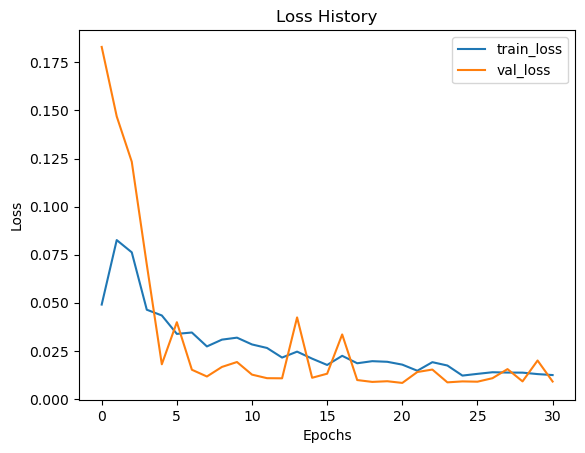

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

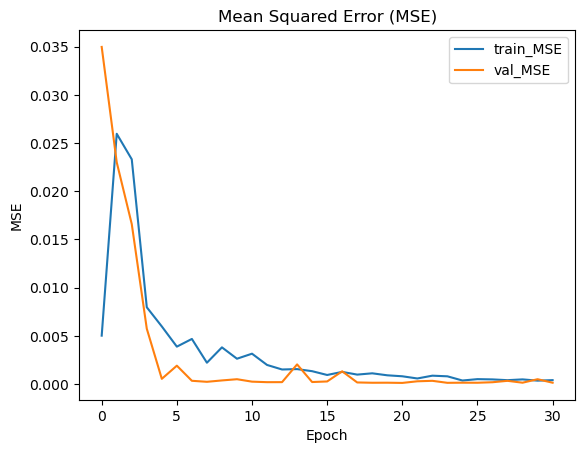

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

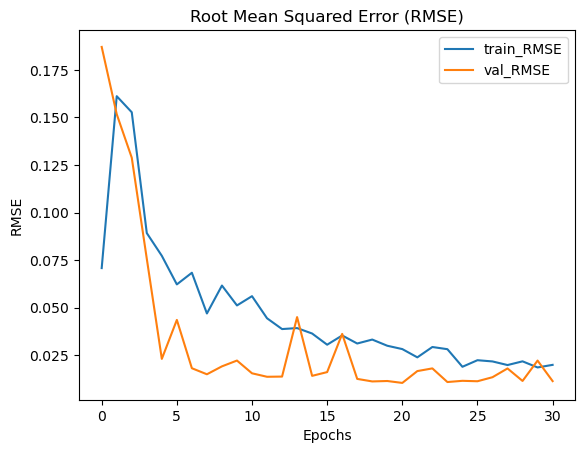

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

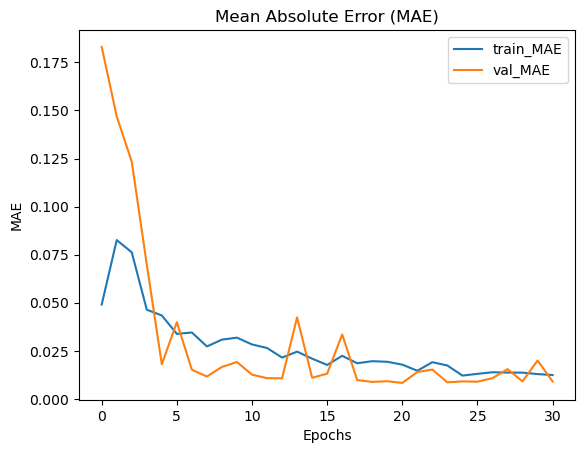

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

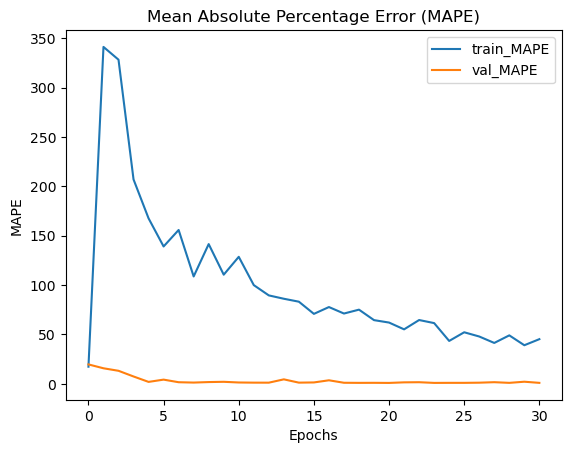

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 18:47:00.196437: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 1)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


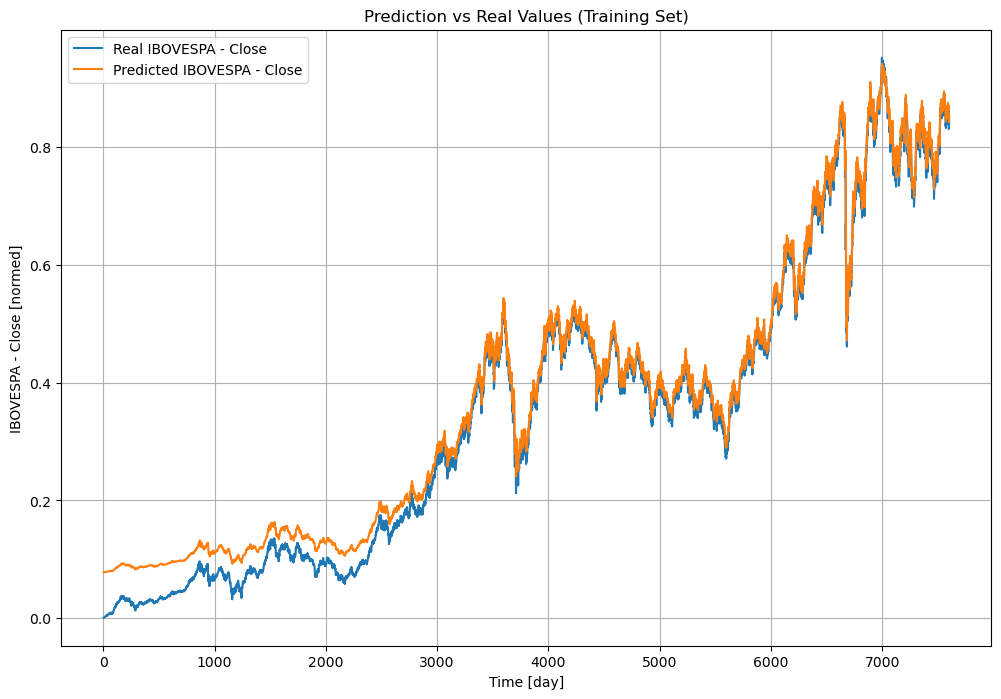

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 1)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


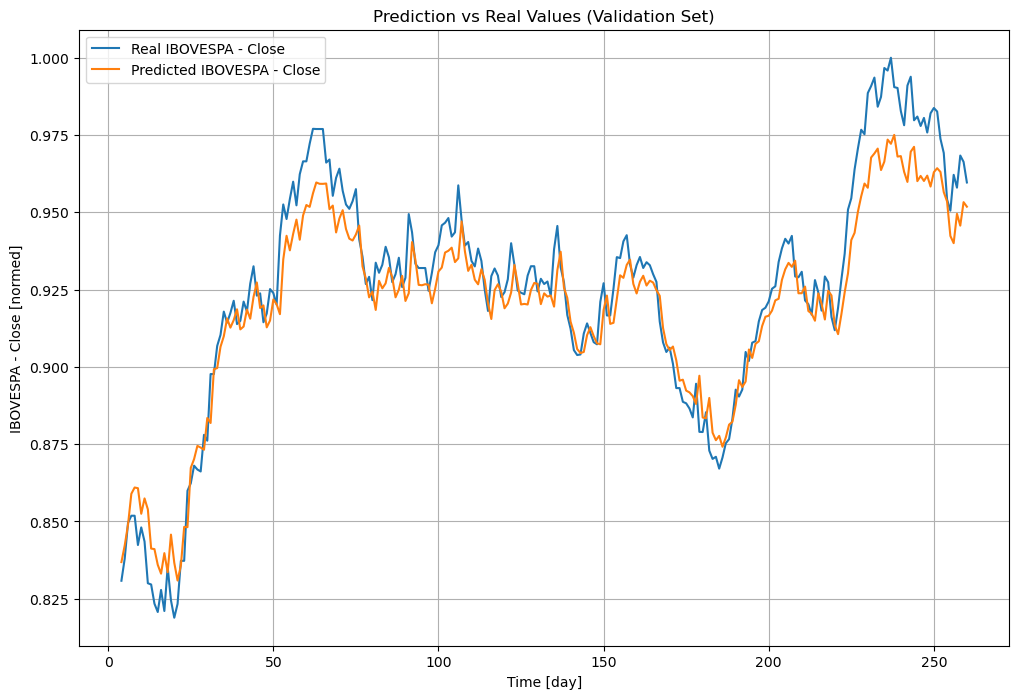

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 1)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


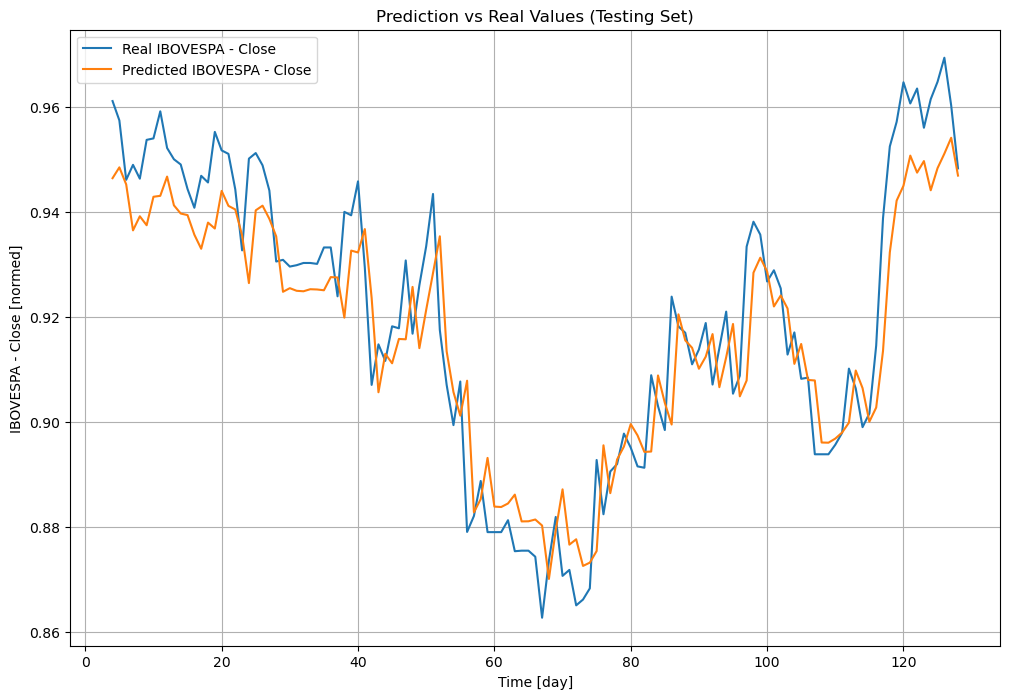

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

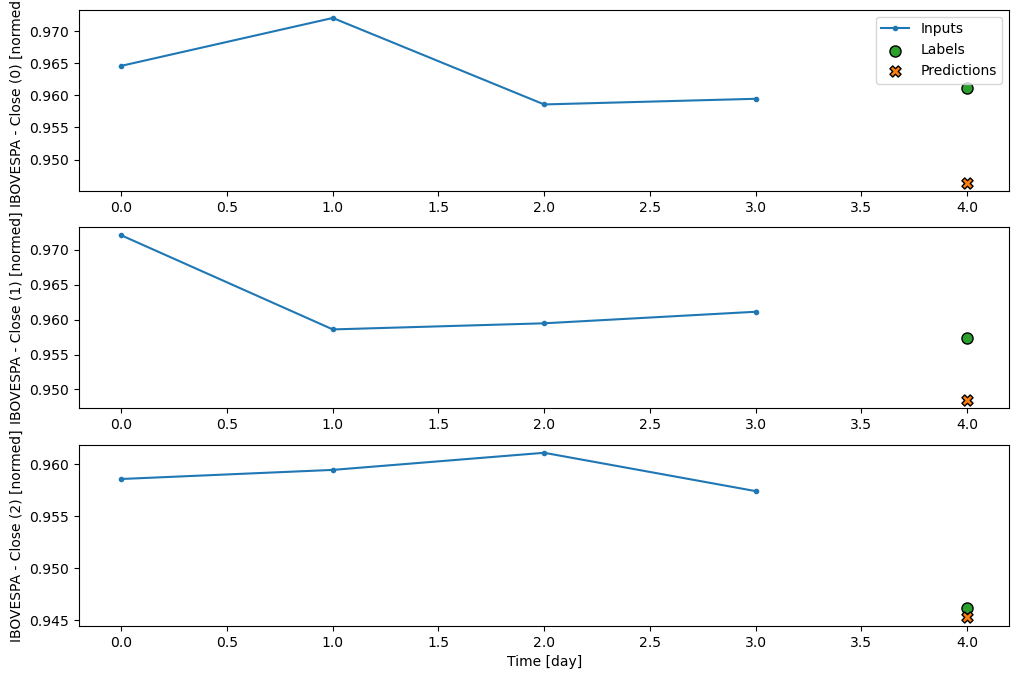

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:21s:354ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


array([[[0.9464151 , 0.9464151 , 0.9464151 , ..., 0.9464151 ,
         0.9464151 , 0.9464151 ]],

       [[0.94847983, 0.94847983, 0.94847983, ..., 0.94847983,
         0.94847983, 0.94847983]],

       [[0.94523454, 0.94523454, 0.94523454, ..., 0.94523454,
         0.94523454, 0.94523454]],

       ...,

       [[0.9510904 , 0.9510904 , 0.9510904 , ..., 0.9510904 ,
         0.9510904 , 0.9510904 ]],

       [[0.9541146 , 0.9541146 , 0.9541146 , ..., 0.9541146 ,
         0.9541146 , 0.9541146 ]],

       [[0.946907  , 0.946907  , 0.946907  , ..., 0.946907  ,
         0.946907  , 0.946907  ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')